In [1]:
import os
import textwrap

import requests
import torch

from PIL import Image
from pathlib import Path

from prismatic import load

/home/localstorage/miniconda3/envs/prismatic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda:7") if torch.cuda.is_available() else torch.device("cpu")

# Load a pretrained VLM (either local path, or ID to auto-download from the HF Hub) 
model_id = "prismatic-vlms/runs/llava-lvis4v-lrv+my_phi2_siglip_model+stage-finetune+x7/"
vlm = load(model_id)
vlm.to(device, dtype=torch.bfloat16)

04/16 [10:50:12] INFO     | >> [*] Loading from local path                                               ]8;id=617081;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/load.py\load.py]8;;\:]8;id=505621;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/load.py#52\52]8;;\
                          `/home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/runs/llava-lvis4v-lrv+my_phi2_sigl           
                          ip_model+stage-finetune+x7`                                                              

                 INFO     | >> [*] Found Config =>> Loading & Freezing my_phi2_siglip_model with:        ]8;id=560965;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/load.py\load.py]8;;\:]8;id=70429;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/load.py#73\73]8;;\
                                       Vision Backbone =>> siglip-vit-b16-384px                                    
                                       LLM Backbone    =>> phi2_base                                               
                                       Arch Specifier  =>> gelu-mlp                                                
                                       Checkpoint Path =>>                                                         
                          `/home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/runs/llava-lvis4v-lrv+my_phi2_sigl           
                          ip_model+stage-finetune+x7/checkpoints/latest-checkpoint.pt`                             

                 INFO     | >> [*] Loading Vision Backbone siglip-vit-b16-384px                          ]8;id=412482;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/load.py\load.py]8;;\:]8;id=109205;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/load.py#82\82]8;;\

04/16 [10:50:14] INFO     | >> Loading pretrained weights from Hugging Face hub                     ]8;id=219974;file:///home/localstorage/miniconda3/envs/prismatic/lib/python3.10/site-packages/timm/models/_builder.py\_builder.py]8;;\:]8;id=205543;file:///home/localstorage/miniconda3/envs/prismatic/lib/python3.10/site-packages/timm/models/_builder.py#186\186]8;;\
                          (('timm/ViT-B-16-SigLIP-384', 'open_clip_pytorch_model.bin'))                            

                 INFO     | >>  Safe alternative available for 'open_clip_pytorch_model.bin' (as        ]8;id=163003;file:///home/localstorage/miniconda3/envs/prismatic/lib/python3.10/site-packages/timm/models/_hub.py\_hub.py]8;;\:]8;id=884765;file:///home/localstorage/miniconda3/envs/prismatic/lib/python3.10/site-packages/timm/models/_hub.py#180\180]8;;\
                          'open_clip_model.safetensors'). Loading weights using safetensors.                       

04/16 [10:50:15] INFO     | >> [*] Loading Pretrained LLM phi2_base via HF Transformers                  ]8;id=713540;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/load.py\load.py]8;;\:]8;id=188873;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/load.py#89\89]8;;\

                 INFO     | >>     |=> Building empty phi2 LLM from `microsoft/phi-2`               ]8;id=445958;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/backbones/llm/base_llm.py\base_llm.py]8;;\:]8;id=924290;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/backbones/llm/base_llm.py#141\141]8;;\

04/16 [10:51:04] INFO     | >>     |=> Loading phi2 (Fast) Tokenizer via the AutoTokenizer API      ]8;id=793763;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/backbones/llm/base_llm.py\base_llm.py]8;;\:]8;id=503623;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/backbones/llm/base_llm.py#175\175]8;;\

04/16 [10:51:09] INFO     | >> [*] Loading VLM my_phi2_siglip_model from Checkpoint; Freezing Weights 🥶 ]8;id=793367;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/load.py\load.py]8;;\:]8;id=542382;file:///home/DSO_SSD/Nithish/LVLMs/prismatic-vlms/prismatic/models/load.py#98\98]8;;\

PrismaticVLM(
  (vision_backbone): SigLIPViTBackbone(
    (featurizer): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=768, out_features=768, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Li

In [3]:
print("Total params = ",sum(p.numel() for p in vlm.parameters()))
print("Trainable params = ",sum(p.numel() for p in vlm.parameters() if p.requires_grad))

Total params =  2879371639
Trainable params =  0


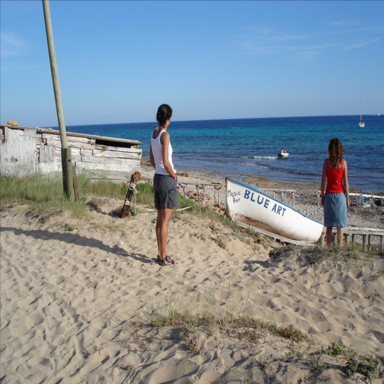

In [26]:
# Download an image and specify a prompt
image_url = "https://datasets-server.huggingface.co/assets/visual_genome/--/attributes_v1.0.0/train/28/image/image.jpg?Expires=1713238968&Signature=QkFryNKCTA5XBXgjatfaUCIZx81RAMOjXk45F3PODmt3hWGMC7pDl~dmM-7i4CpA3uCaa4FyqCtIbUL25H35UlOLCONBmB9t40jFhgFkXbIF5W-HekK31uQNYLE6kI5wfZWVMoX9WAWznIXCNyXTPV6B2gAj9~Eh1N7TDogoPTlC7iIuznC40262cYI8l7PE6tHPNf82gmI4viUQc7lkZ3R1GMxLvRqdL9kApzCbaq0pM~8ARCikOjVt4dmEjI5Ajs1afIzJZ-TRnI7-TtrlINsfoknFIxhvMhMi7PbwPyMCktqQAahIRxaDvptU3JIxHpl6pOU~fB6zwrp01G2ZtA__&Key-Pair-Id=K3EI6M078Z3AC3"
image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")
image = image.resize((384,384))
display(image)
# the model sees the image at 384p resolution.

In [28]:
prompt_builder = vlm.get_prompt_builder()
def chat_with_model(user_query):
    prompt_builder.add_turn(role="human", message=user_query)
    prompt_text = prompt_builder.get_prompt()
    generated_text = vlm.generate(
        image,
        prompt_text,
        do_sample=True,
        temperature=0.1,
        max_new_tokens=512,
        min_length=1,
        )
    prompt_builder.add_turn(role="gpt", message=generated_text)
    return generated_text

In [30]:
user_prompt = "Describe the two people you see in this picture!"
generated_text = chat_with_model(user_prompt)
print(textwrap.fill(generated_text, width=150))

I see a man and a woman in the picture. The man is wearing a blue shirt and jeans, while the woman is wearing a white dress.


In [ ]:
"""
"What is written on the boat?"
The boat has a blue and white flag with the words "Blue Art" written on it.

"How many people do you see in this picture?"
I see two people in this picture.

"Is any of them wearing green colored dress?"
Yes, one of the people in the picture is wearing a green colored dress.
"""